# Previsão de série temporal
OBS.: Exemplo a seguir é uma questão da lista do curso DCA0133 - Aprendizagem de Máquina, pago em 2018.

Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo da série temporal $x[n] = \sin (n+\sin^{2}(n))$. Avalie o desempenho mostrando o erro de predição.

Abordaremos o problema da seguinte forma: A rede será treinada para gerar o valor da função objetivo dado vários outros passados. Cada uma das amostras de `x_treino` então são vetores com valores imediatamente anteriores a um determinado n e `y_treino` é o próximo valor da série. Para exemplificar, faremos uma versão simplificada de treino na qual estimaremos o $x[10]$ com 5 amostras de 5 valores de x cada. O dados de teino podem ser conforme a tabela:

<table>
  <tr>
      <td>x_treino</td>
      <td>y_treino</td>
  </tr>
  <tr>
    <td>$x[1]$, $x[2]$, $x[3]$, $x[4]$</td>
    <td>$x[5]$</td>
  </tr>
  <tr>
    <td>$x[2]$, $x[3]$, $x[4]$, $x[5]$</td>
    <td>$x[6]$</td>
  </tr>
  <tr>
    <td>$x[3]$, $x[4]$, $x[5]$, $x[6]$</td>
    <td>$x[7]$</td>
  </tr>
  <tr>
    <td>$x[4]$, $x[5]$, $x[6]$, $x[7]$</td>
    <td>$x[8]$</td>
  </tr>
  <tr>
    <td>$x[5]$, $x[6]$, $x[7]$, $x[8]$</td>
    <td>$x[9]$</td>
  </tr>
</table>

Ao passar a entrada $x[6]$, $x[7]$, $x[8]$, $x[9]$, espera-se que a rede retorne $x[10]$.

## Bibliotecas e funções

In [1]:
import numpy as np
import keras.layers as kl
import keras.models as km
import keras.callbacks as kc
import matplotlib.pyplot as plt

def objetivo(n):
    return np.sin(n+np.sin(n)**2)


Using TensorFlow backend.


Fizemos um gráfico contínuo e outro discreto para visualizar a curva original e a descrita na função `objetivo()` de 0 a 50. O gráfico discreto é o contínuo amostrado a uma taxa de 1 Hz (uma amostra por segundo).

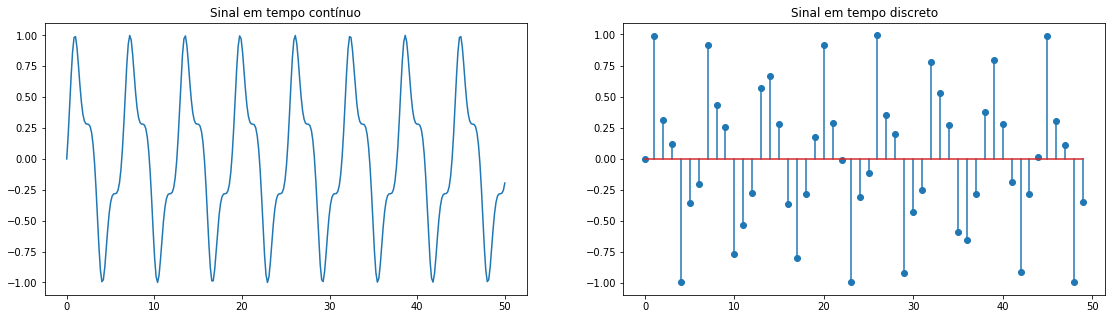

In [2]:
plt.figure(figsize=(19, 5))
plt.subplot(121)
x = np.linspace(0, 50, 300)  # cria um vetor coluna
y = objetivo(x)  # Também é vetor coluna
plt.title('Sinal em tempo contínuo')
plt.plot(x, y)

plt.subplot(122)
x = np.arange(0, 50).reshape(-1, 1)  # cria um vetor coluna
y = objetivo(x)  # Também é vetor coluna
plt.title('Sinal em tempo discreto')
plt.stem(x, y)
plt.show()

## Dados de treino
A variável `n` é o índice temporal do valor que desejamos **prever**. Estamos usando 500 amostras de 50 valores cada.



In [3]:
n=100  # Índice temporal do valor que será previsto 
qtd_pts = 50  # quantos valores há em cada amostra
qtd_amostra = 500  # quantas amostras serão usadas para treinar
x_treino,y_treino = [],[]

for i in range(qtd_amostra):
    ind = np.arange(n-i-1-qtd_pts, n-i-1) # índices temporais
    x_treino.append(objetivo(ind))
    y_treino.append(objetivo(n-i-1))
x_treino = np.array(x_treino)
y_treino = np.array(y_treino)

## Construindo rede neural
O modelo foi configurado para treinar por 1500 épocas, mas isso nunca é alcançado. O monitor está checando a função custo constantemente e se seu valor não mudar entre duas épocas o treino é interrompido. Nunca foi necessário mais que 30 épocas.

Foram testadas várias funções de ativação mas o melhor desempenho obtido foi usando a $f(x)=x$.

In [4]:
model = km.Sequential()
model.add(kl.Dense(60, input_dim=qtd_pts, activation='linear'))
model.add(kl.Dense(60, activation='linear'))
model.add(kl.Dense(60, activation='linear'))
model.add(kl.Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

monitor = kc.EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='auto')
H = model.fit(x_treino, y_treino, epochs=1500, batch_size=5, verbose=0, callbacks=[monitor])


## Validação
Histórico de custo abaixo.

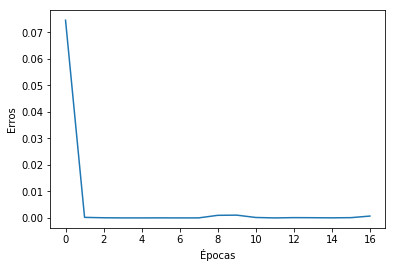

In [5]:
plt.plot(H.history['loss'])
plt.xlabel('Épocas')
plt.ylabel('Erros')
plt.show()

Finalmente, vamos ver se a rede neural descobre sozinha o valor de $x[n]$, para o n definido na seção *Dados de Treino*. Para isso, temos de passar os 50 valores de x anteriores, $x[n-51]$ a $x[n-1]$. O numpy oferece-nos o `np.arange(a, b)`, que cria um vetor de inteiros de a até b-1 seguindo passo unitário. Aplicando a lista de valores à função `model.predict()` temos o $x$ previsto.

In [6]:
#Dados de previsão
ind=np.arange(n-50,n)
previsao = model.predict(np.array([objetivo(ind)]))[0][0]
gabarito = objetivo(n)

print('previsão: '+str(previsao))
print('gabarito: '+str(gabarito))

previsão: -0.27244934
gabarito: -0.27112224270398794
